In [3]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom


In [38]:
# try calculating every potential outcome - but this algorithm gets very slow very fast
df = pd.DataFrame(
    [np.prod(outcome) for outcome in list(itertools.product([1.5,.6], repeat=0))]
).describe(percentiles = [.01, .05, .1, .3,  0.5, .8, .9, .95, .99 ]).T

for i in range(10):
    df = df.append(
        pd.DataFrame(
            [np.prod(outcome) for outcome in list(itertools.product([1.5,.6], repeat=i+1))]
        ).describe(
            percentiles = [.01, .05, .1, .3,  0.5, .8, .9, .95, .99 ] 
        ).T
    )

df

,count,mean,std,min,1%,5%,10%,30%,50%,80%,90%,95%,99%,max
0,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,2.0,1.050000,0.636396,0.600000,0.609000,0.645000,0.690000,0.870000,1.050000,1.320000,1.410000,1.455000,1.491000,1.500000
0,4.0,1.102500,0.806241,0.360000,0.376200,0.441000,0.522000,0.846000,0.900000,1.440000,1.845000,2.047500,2.209500,2.250000
0,8.0,1.157625,1.004192,0.216000,0.238680,0.329400,0.442800,0.540000,0.945000,1.350000,1.957500,2.666250,3.233250,3.375000
0,16.0,1.215506,1.231947,0.129600,0.158760,0.275400,0.324000,0.567000,0.810000,2.025000,2.025000,2.784375,4.606875,5.062500
0,32.0,1.276282,1.491823,0.077760,0.113918,0.194400,0.194400,0.486000,0.850500,1.215000,3.037500,3.037500,6.181313,7.593750
0,64.0,1.340096,1.786984,0.046656,0.090746,0.116640,0.169128,0.291600,0.729000,1.822500,3.736125,4.556250,7.084969,11.390625
0,128.0,1.407100,2.121552,0.027994,0.069984,0.069984,0.174960,0.437400,0.765450,2.733750,2.733750,6.834375,6.834375,17.085938
0,256.0,1.477455,2.500652,0.016796,0.041990,0.104976,0.104976,0.262440,0.656100,1.640250,4.100625,4.100625,10.251562,25.628906
0,512.0,1.551328,2.930432,0.010078,0.025194,0.062986,0.157464,0.393660,0.688905,2.460375,2.460375,6.150937,15.377344,38.443359


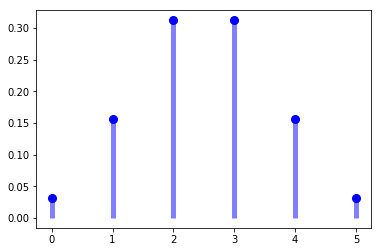

In [158]:
# try with the scipy binom function
n, p = 5, 0.5
x = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(1, n, p)+1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [64]:
binom.pmf(x, n, p)

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [65]:
# calculate means and percentiles
n = 5
p = 0.5
dist = binom(n,p)
mean = dist.mean()
pct50 = dist.median()
pct1, pct99 = dist.interval(0.99)
pct5, pct95 = dist.interval(0.95)
pct10, pct90 = dist.interval(0.9)
pct25, pct75 = dist.interval(.75)
(mean, pct1, pct5, pct10, pct25, pct50, pct75, pct90, pct95, pct99)

(2.5, 0.0, 0.0, 1.0, 1.0, 2.0, 4.0, 4.0, 5.0, 5.0)

The x-axis, k, is the number of times the event (i.e., heads) has occurred.  The value at location k is 1.5^k*0.6^(n-k)

In [66]:
v = (1.5**x)*(0.6**(n-x))
v

array([0.07776, 0.1944 , 0.486  , 1.215  , 3.0375 , 7.59375])

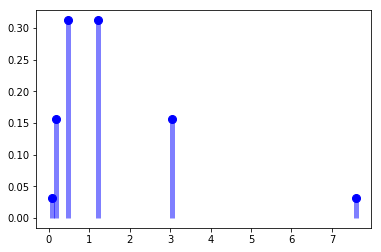

In [67]:
# plot with expected values
fig, ax = plt.subplots(1, 1)
ax.plot(v, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(v, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

Since it is a discrete function, the percentiles can be calculated based on the original PMF, but the average needs to be recalcuated from all the data.  

In [68]:
v

array([0.07776, 0.1944 , 0.486  , 1.215  , 3.0375 , 7.59375])

In [77]:
dist.pmf(x)

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [71]:
np.multiply(v, binom.pmf(x, n, p)).sum()

1.2762815624999997

Back to the means and percentiles

In [153]:

df = pd.DataFrame()
n = 5
p = 0.5

for n in range(1,500):

    dist = binom(n,p)
    x = np.arange(binom.ppf(0.0001, n, p),
              binom.ppf(1, n, p)+1)
    v = v = (1.5**x)*(0.6**(n-x))
    
    mean = np.multiply(v, dist.pmf(x)).sum()
    pct50 = dist.median()
    pct1, pct99 = dist.interval(0.99)
    pct5, pct95 = dist.interval(0.95)
    pct10, pct90 = dist.interval(0.9)
    pct25, pct75 = dist.interval(.75)
    pcts = [pct1, pct5, pct10, pct25, pct50, pct75, pct90, pct95, pct99]

    pcts = np.vectorize(dict(zip(x,v)).get)(pcts)
    pcts

    sum_data = list(pcts)
    sum_data.append(mean)
    sum_data

    df[n] = sum_data
df

,1,2,3,4,5,6,7,8,9,10,...,490,491,492,493,494,495,496,497,498,499
0,0.60,0.3600,0.216000,0.129600,0.077760,0.046656,0.027994,0.041990,0.025194,0.015117,...,4.437053e-23,2.662232e-23,1.597339e-23,2.396008e-23,1.437605e-23,2.156408e-23,1.293845e-23,1.940767e-23,1.164460e-23,1.746690e-23
1,0.60,0.3600,0.216000,0.129600,0.077760,0.116640,0.069984,0.041990,0.062986,0.037791,...,1.083265e-20,1.624897e-20,9.749383e-21,1.462407e-20,8.774445e-21,1.316167e-20,7.897000e-21,1.184550e-20,7.107300e-21,1.066095e-20
2,0.60,0.3600,0.216000,0.129600,0.194400,0.116640,0.069984,0.104976,0.062986,0.037791,...,4.231503e-19,2.538902e-19,3.808353e-19,2.285012e-19,3.427517e-19,2.056510e-19,3.084766e-19,1.850859e-19,2.776289e-19,1.665773e-19
3,0.60,0.3600,0.216000,0.324000,0.194400,0.291600,0.174960,0.104976,0.157464,0.094478,...,4.132327e-17,6.198491e-17,3.719094e-17,5.578642e-17,3.347185e-17,5.020778e-17,3.012467e-17,4.518700e-17,2.711220e-17,4.066830e-17
4,0.60,0.9000,0.540000,0.810000,0.486000,0.729000,1.093500,0.656100,0.393660,0.590490,...,6.157647e-12,3.694588e-12,5.541883e-12,3.325130e-12,4.987694e-12,2.992617e-12,4.488925e-12,2.693355e-12,4.040032e-12,2.424019e-12
5,1.50,2.2500,1.350000,2.025000,3.037500,1.822500,2.733750,4.100625,2.460375,3.690562,...,9.175610e-07,5.505366e-07,8.258049e-07,4.954829e-07,7.432244e-07,4.459346e-07,6.689019e-07,4.013412e-07,6.020117e-07,3.612070e-07
6,1.50,2.2500,3.375000,5.062500,3.037500,4.556250,6.834375,4.100625,6.150937,9.226406,...,8.960556e-05,1.344083e-04,8.064501e-05,1.209675e-04,7.258051e-05,1.088708e-04,6.532245e-05,9.798368e-05,5.879021e-05,8.818531e-05
7,1.50,2.2500,3.375000,5.062500,7.593750,4.556250,6.834375,10.251563,6.150937,9.226406,...,3.500217e-03,2.100130e-03,3.150196e-03,1.890117e-03,2.835176e-03,1.701106e-03,2.551658e-03,1.530995e-03,2.296493e-03,1.377896e-03
8,1.50,2.2500,3.375000,5.062500,7.593750,11.390625,17.085938,10.251563,15.377344,23.066016,...,8.545452e-01,1.281818e+00,1.922727e+00,1.153636e+00,1.730454e+00,1.038272e+00,1.557409e+00,9.344452e-01,1.401668e+00,8.410007e-01
9,1.05,1.1025,1.157625,1.215506,1.276282,1.340096,1.407100,1.477455,1.551328,1.628895,...,2.414107e+10,2.534813e+10,2.661553e+10,2.794631e+10,2.934362e+10,3.081080e+10,3.235134e+10,3.396891e+10,3.566736e+10,3.745073e+10


In [154]:
df = df.T
df

,0,1,2,3,4,5,6,7,8,9
1,6.000000e-01,6.000000e-01,6.000000e-01,6.000000e-01,6.000000e-01,1.500000e+00,1.500000,1.500000,1.500000,1.050000e+00
2,3.600000e-01,3.600000e-01,3.600000e-01,3.600000e-01,9.000000e-01,2.250000e+00,2.250000,2.250000,2.250000,1.102500e+00
3,2.160000e-01,2.160000e-01,2.160000e-01,2.160000e-01,5.400000e-01,1.350000e+00,3.375000,3.375000,3.375000,1.157625e+00
4,1.296000e-01,1.296000e-01,1.296000e-01,3.240000e-01,8.100000e-01,2.025000e+00,5.062500,5.062500,5.062500,1.215506e+00
5,7.776000e-02,7.776000e-02,1.944000e-01,1.944000e-01,4.860000e-01,3.037500e+00,3.037500,7.593750,7.593750,1.276282e+00
6,4.665600e-02,1.166400e-01,1.166400e-01,2.916000e-01,7.290000e-01,1.822500e+00,4.556250,4.556250,11.390625,1.340096e+00
7,2.799360e-02,6.998400e-02,6.998400e-02,1.749600e-01,1.093500e+00,2.733750e+00,6.834375,6.834375,17.085938,1.407100e+00
8,4.199040e-02,4.199040e-02,1.049760e-01,1.049760e-01,6.561000e-01,4.100625e+00,4.100625,10.251563,10.251563,1.477455e+00
9,2.519424e-02,6.298560e-02,6.298560e-02,1.574640e-01,3.936600e-01,2.460375e+00,6.150937,6.150937,15.377344,1.551328e+00
10,1.511654e-02,3.779136e-02,3.779136e-02,9.447840e-02,5.904900e-01,3.690562e+00,9.226406,9.226406,23.066016,1.628895e+00


In [156]:
df.columns  = ['pct1', 'pct5', 'pct10', 'pct25', 'pct50', 'pct75', 'pct90', 'pct95', 'pct99', 'mean']
df.head()


,pct1,pct5,pct10,pct25,pct50,pct75,pct90,pct95,pct99,mean
1,0.60000,0.60000,0.6000,0.6000,0.600,1.5000,1.5000,1.50000,1.50000,1.050000
2,0.36000,0.36000,0.3600,0.3600,0.900,2.2500,2.2500,2.25000,2.25000,1.102500
3,0.21600,0.21600,0.2160,0.2160,0.540,1.3500,3.3750,3.37500,3.37500,1.157625
4,0.12960,0.12960,0.1296,0.3240,0.810,2.0250,5.0625,5.06250,5.06250,1.215506
5,0.07776,0.07776,0.1944,0.1944,0.486,3.0375,3.0375,7.59375,7.59375,1.276282


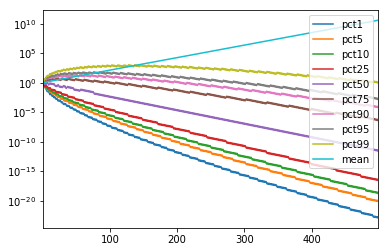

In [157]:
# plot the results- this is the same plot shown in the article
fig, ax = plt.subplots()
df.plot.line(logy = True,ax = ax)

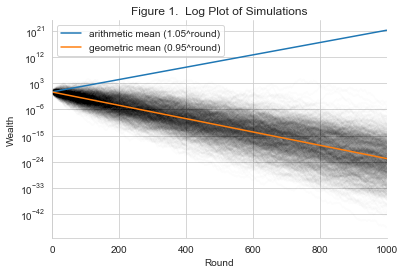

In [20]:
plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[-2:], labels = labels[-2:])

plt.title('Figure 1.  Log Plot of Simulations')
plt.ylabel('Wealth')
plt.xlabel('Round')
sns.set_style("whitegrid")
sns.despine()

In [134]:

df

""


In [127]:
pd.concat([df, pd.Series(sum_data)], ignore_index = True)

,0,mean,pct1,pct10,pct25,pct5,pct50,pct75,pct90,pct95,pct99
0,1.276282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.077760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.077760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.194400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.194400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.486000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.037500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.037500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.593750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7.593750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
map_dict = dict(zip(x,v))
map_dict

{0.0: 0.07775999999999998,
 1.0: 0.1944,
 2.0: 0.48599999999999993,
 3.0: 1.2149999999999999,
 4.0: 3.0375,
 5.0: 7.59375}

In [84]:
list(map(pcts,map_dict))

TypeError: 'list' object is not callable

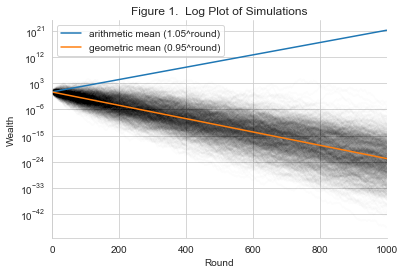

In [20]:
plt.plot(x, arith_y, label = 'arithmetic mean (1.05^round)')
plt.plot(x, geo_y, label = 'geometric mean (0.95^round)')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles = handles[-2:], labels = labels[-2:])

plt.title('Figure 1.  Log Plot of Simulations')
plt.ylabel('Wealth')
plt.xlabel('Round')
sns.set_style("whitegrid")
sns.despine()